# Kernel - PCA

In [27]:
# import all libraries
import numpy as np  
import pandas as pd  
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [28]:
# load datasets
dataset = pd.read_csv('/home/admin1/Machine Learning/WEEK_16/Kernel-PCA/Social_Network_Ads.csv')

In [29]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [30]:
# sample data of given dataset
dataset.sample()

,User ID,Gender,Age,EstimatedSalary,Purchased
291,15596522,Male,49,89000,1


In [31]:
# split data into train and test
train_set,test_set = train_test_split(dataset,test_size=0.2)

In [32]:
train_set.shape,test_set.shape

((320, 5), (80, 5))

In [33]:
# split train dataset into train and cross validation
train, cross = train_test_split(train_set,test_size=0.2)

In [34]:
train.shape,cross.shape

((256, 5), (64, 5))

In [35]:
# seperate input features and labels train data
x_train = train.iloc[:,2:4].values
y_train = train.iloc[:,4].values

In [36]:
x_train.shape,y_train.shape

((256, 2), (256,))

In [37]:
# seperate input features and labels cross validation
x_cv = cross.iloc[:,2:4].values
y_cv = cross.iloc[:,4].values

In [38]:
x_cv.shape,y_cv.shape

((64, 2), (64,))

In [39]:
def feature_scaling(data):
    sc = StandardScaler()
    data = sc.fit_transform(data)
    return data,sc

In [40]:
# apply feature scaling on train data
x_train,scale_obj_train = feature_scaling(x_train)

In [41]:
# apply feature scaling on cross validation
x_cv,scale_obj_cv= feature_scaling(x_cv)

# Applying Kernel_PCA

In [42]:
# Applying dimensional reduction technique i.e PCA
k_pca = KernelPCA(n_components=2,kernel='rbf')
x_train = k_pca.fit_transform(x_train,y_train)
x_cv = k_pca.transform(x_cv)

The PCA class contains explained_variance _ratio_ which returns the variance caused by each of the principal components.

# Training Model

In [43]:
# fitting RandomForestClassifier 
classifier  = LogisticRegression(random_state=0)
classifier.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
# make predictions on train data and cross validation
predict_train = classifier.predict(x_train)
predict_cv = classifier.predict(x_cv)

In [45]:
# performance evaluation on train data
cm = confusion_matrix(y_train, predict_train)  
print(cm)  
train_acc = accuracy_score(y_train, predict_train)*100
print('Accuracy on train:',train_acc)

[[151  15]
 [ 14  76]]
Accuracy on train: 88.671875


In [46]:
# performance evaluation on cross validation
cm = confusion_matrix(y_cv, predict_cv)  
print(cm)  
cross_acc = accuracy_score(y_cv, predict_cv)*100
print('Accuracy on cross:',cross_acc)

[[32  2]
 [ 9 21]]
Accuracy on cross: 82.8125


In [47]:
# visualization on graph
def visualization(x,y,classifier):
        x1,x2=np.meshgrid(np.arange(start=x[:,0].min()-1,stop=x[:,0].max()+1,step=0.01),np.arange(start=x[:,1].min()-1,stop=x[:,1].max()+1,step=0.01 ))
        plt.contourf(x1,x2,classifier.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),alpha=0.75,cmap=ListedColormap(('black','white')))
        
        # limit the age and salary         
        plt.xlim(x1.min(),x1.max())
        plt.ylim(x2.min(),x2.max())
       
        # plots all the datapoints in graph         
        for i,j in enumerate(np.unique(y)):
            plt.scatter(x[y==j,0],x[y==j,1],c=ListedColormap(('red','green'))(i),label=j)

        plt.title('Logistic Regression(Training  Set)')
        plt.xlabel('Age')
        plt.ylabel('Estimated Salary')
        plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


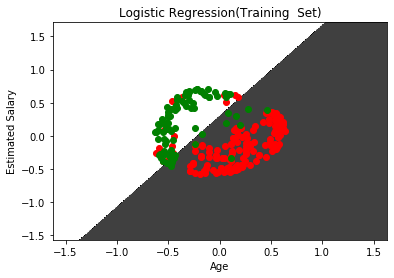

In [48]:
# visualization of train data
visualization(x_train,y_train,classifier)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


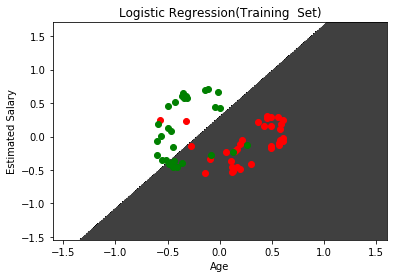

In [49]:
# visualization of train data
visualization(x_cv,y_cv,classifier)

# Saving Model

In [51]:
# saving train model
import pickle
if cross_acc > 70:
    file_object = open('train.pkl','wb')
    pickle.dump(classifier,file_object)
    pickle.dump(scale_obj_train,file_object)
    pickle.dump(k_pca,file_object)
    file_object.close()
    print('Your model is saved successfully')

Your model is saved successfully


In [52]:
# saving test data into pickle
file_object = open('test.pkl','wb')
pickle.dump(test_set,file_object)
file_object.close()